# **COMPARATIVE ANALYSIS OF CHROMOSOME TRINUCLEOTIDE REPEATS**

**Student:** Gladys Jacob  

**Course:** BIO 466 - Final Project

**Instructor:** Professor Chun Liang

**Date:** December 2, 2025

 ## **Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title ### **Install Dependencies**
! sudo apt install bedtools -qq
! pip install -q pyfaidx biopython pytrf pyfastx pybedtools
print("All dependencies installed successfully")

The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package bedtools.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# @title ### **Import Libraries**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import pytrf
import pyfastx
from pytrf import STRFinder

print("All libraries imported successfully")

All libraries imported successfully


## **I. Project Overview**

This project performs a comprehensive comparative analysis of trinucleotide tandem repeats across two human chromosomes using PyTRF for repeat detection and Pandas for data analysis.

**<u>Research Question:</u>**  


> How do trinucleotide repeat patterns differ between chromosomes with contrasting sizes and gene densities?

**<u>Hypothesis:</u>**  


> Trinucleotide repeat distribution is influenced by local genomic context (gene density, chromatin state) rather than global chromosome properties (size).




## **II. Rationale**

### **A. Chromosome Selection**
> These two chromosomes provide an ideal contrast to test the hypothesis that trinucleotide repeat distribution is influenced by local genomic context (gene density, chromatin state) rather than global chromosome properties (size).

---


**Chromosome 1:**

---


- Largest human chromosome (~249 Mb)
- Moderate gene density (~8 genes/Mb)
- Contains ~2,000 protein-coding genes
- Representative of large, moderately gene-dense chromosomes

---



**Chromosome 19:**

---


- Smaller chromosome (~59 Mb) - approximately 4× smaller than Chr 1
- **Highest gene density** in the human genome (~24 genes/Mb)
- Contains ~1,400 protein-coding genes despite smaller size
- Exceptionally GC-rich compared to genome average

**Expected patterns if trinucleotides are functionally associated with genes:**
1. Higher density in Chr 19 (more genes per Mb)
2. Greater genic association in Chr 19
3. Similar motif preferences

### **B. Tandem Repeat Selection: Trinucleotides (≥3 copies)**

**1. Medical Relevance**

Trinucleotide repeats are implicated in over 40 human genetic diseases, primarily affecting the nervous system:

| Disease | Repeat | Gene | Pathogenic Threshold |
|---------|--------|------|---------------------|
| Huntington's Disease | CAG | HTT | >35 copies |
| Fragile X Syndrome | CGG | FMR1 | >200 copies |
| Myotonic Dystrophy | CTG | DMPK | >50 copies |
| Friedreich's Ataxia | GAA | FXN | >66 copies |

**2. Biological Significance**

- In coding regions - creates amino acid repeats (polyglutamine, polyalanine tracts)
- In regulatory regions - influences gene expression, chromatin structure
- Genome-wide - serves as markers of replication stress and genome instability

**3. Analytical Considerations**

- Quantity -  Thousands of instances genome-wide enable robust statistical analysis
- Specificity - Distinct from other repeat classes (mono-, di-, tetranucleotides)
- Threshold justification - ≥3 copies (≥9 bp) filters noise while capturing biologically relevant repeats

## **III. Methods**

### **Step 1: Download Data**

Genome Assembly: GRCh38 (Homo sapiens reference genome)  
Data Source: Ensembl Release 114  
Download Date: November 2025

**Files downloaded:**
1. Chromosome FASTA files (.fa) - complete DNA sequences
2. Gene annotation files (.gff3) - gene coordinates and features


In [ ]:
! wget https://ftp.ensembl.org/pub/release-114/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz
! wget https://ftp.ensembl.org/pub/release-114/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.19.fa.gz
! wget https://ftp.ensembl.org/pub/release-114/gff3/homo_sapiens/Homo_sapiens.GRCh38.114.chromosome.1.gff3.gz
! wget https://ftp.ensembl.org/pub/release-114/gff3/homo_sapiens/Homo_sapiens.GRCh38.114.chromosome.19.gff3.gz

--2025-12-04 01:18:10--  https://ftp.ensembl.org/pub/release-114/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69273468 (66M) [application/x-gzip]
Saving to: ‘Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz’

Homo_sapiens.GRCh38 100%[===================>]  66.06M  30.1MB/s    in 2.2s    

2025-12-04 01:18:13 (30.1 MB/s) - ‘Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz’ saved [69273468/69273468]

--2025-12-04 01:18:13--  https://ftp.ensembl.org/pub/release-114/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.19.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16689382 (16M) [application/x-gzip]
Saving to: ‘Homo_sapien

In [ ]:
!gunzip ./Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz
!gunzip ./Homo_sapiens.GRCh38.dna.chromosome.19.fa.gz
!gunzip ./Homo_sapiens.GRCh38.114.chromosome.1.gff3.gz
!gunzip ./Homo_sapiens.GRCh38.114.chromosome.19.gff3.gz

In [ ]:
! mv Homo_sapiens.GRCh38.dna.chromosome.1.fa /content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human
! mv Homo_sapiens.GRCh38.dna.chromosome.19.fa /content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human
! mv Homo_sapiens.GRCh38.114.chromosome.1.gff3 /content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human
! mv Homo_sapiens.GRCh38.114.chromosome.19.gff3 /content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human

### **Step 2: Trinucleotide Repeat Detection**

**PyTRF Parameters Used:**

- **Tool**: `STRFinder` (Short Tandem Repeat Finder)
- **Motif Size Filter**: `type == 3` (only trinucleotides)
- **Minimum Copies**: `repeat >= 3` (at least 3 repetitions = 9 bp minimum)

---



**Why these parameters?**
- STRFinder is optimized for microsatellite detection (1-6 bp motifs)
- Default parameters work well for detecting stable trinucleotide repeats
- Post-filtering makes ure we only analyze trinucleotides with biological relevance

---



**Detection Process:**
1. Load chromosome FASTA files using pyfastx
2. Scan entire chromosome sequence with STRFinder
3. Filter results to keep only trinucleotides with ≥3 copies
4. Store results in structured dictionaries for downstream analysis


In [ ]:
chr1_fasta = '/content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human/Homo_sapiens.GRCh38.dna.chromosome.1.fa'
chr19_fasta = '/content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human/Homo_sapiens.GRCh38.dna.chromosome.19.fa'

def detect_trinucleotide_repeats(fasta_file, chromosome_name):
    """
    Detect trinucleotide tandem repeats (≥3 copies) from a chromosome FASTA file.
    Returns: list of dictionaries containing repeat information
    """

    # Open the FASTA file and parse sequences
    repeats_list = []
    fa = pyfastx.Fastx(fasta_file, uppercase=True)

    # Loop through sequences
    for seq_name, sequence in fa:
        print(f"Processing sequence: {seq_name}")
        print(f"Sequence length: {len(sequence):,} bp")

        # Use STRFinder to detect trinucleotide repeats
        for ssr in STRFinder(seq_name, sequence):

            # Extract repeat information and store in dictionary
            if ssr.type == 3 and ssr.repeat >= 3:
                repeat_info = {
                    'chrom': seq_name,
                    'start': ssr.start,
                    'end': ssr.end,
                    'motif': ssr.motif,
                    'motif_length': ssr.type,
                    'repeat_number': ssr.repeat,
                    'total_length': ssr.length  #
                }

                repeats_list.append(repeat_info)

    print(f"Found {len(repeats_list):,} trinucleotide repeats in {chromosome_name}")

    return repeats_list

In [ ]:
# Detect repeats in Chromosome 1
chr1_repeats = detect_trinucleotide_repeats(chr1_fasta, "Chromosome 1")

# Detect repeats in Chromosome 19
chr19_repeats = detect_trinucleotide_repeats(chr19_fasta, "Chromosome 19")

print("\n" + "="*60)
print("DETECTION COMPLETE!")
print("="*60)
print(f"Chromosome 1: {len(chr1_repeats):,} trinucleotide repeats")
print(f"Chromosome 19: {len(chr19_repeats):,} trinucleotide repeats")

Processing sequence: 1
Sequence length: 248,956,422 bp
Found 6,105 trinucleotide repeats in Chromosome 1
Processing sequence: 19
Sequence length: 58,617,616 bp
Found 2,359 trinucleotide repeats in Chromosome 19

DETECTION COMPLETE!
Chromosome 1: 6,105 trinucleotide repeats
Chromosome 19: 2,359 trinucleotide repeats


### **Step 3: Pandas DataFrame Construction**

**Objective:** Converts detection results into structured Pandas DataFrames for efficient analysis.

**Initial DataFrame structure:**

| Column | Type | Description |
|--------|------|-------------|
| `chrom` | str | Chromosome identifier (1, 19) |
| `start` | int | Start position (1-based, GFF3 standard) |
| `end` | int | End position (inclusive) |
| `motif` | str | Trinucleotide sequence (e.g., "CAG", "AAT") |
| `motif_length` | int | Always 3 for trinucleotides |
| `repeat_number` | int | Number of tandem copies |
| `total_length` | int | Total repeat length in bp |

**Add Annotation columns:**
- `chromosome`: Human-readable name (Chr1, Chr19)
- `chr_size`: Total chromosome size for calculations
- `genic_status`: "genic" or "intergenic"
- `chromosomal_region`: "euchromatin", "centromere", or "telomere"


In [ ]:
import pandas as pd

# Convert to DataFrames
df_chr1 = pd.DataFrame(chr1_repeats)
df_chr19 = pd.DataFrame(chr19_repeats)

# Add chromosome size information
CHR1_SIZE = 248956422
CHR19_SIZE = 58617616

# Add a column to identify which chromosome each repeat belongs to
df_chr1['chromosome'] = 'Chr1'
df_chr19['chromosome'] = 'Chr19'

# Add chromosome size as a column
df_chr1['chr_size'] = CHR1_SIZE
df_chr19['chr_size'] = CHR19_SIZE

# Display first few rows
print("="*60)
print("CHROMOSOME 1 - First 10 trinucleotide repeats:")
print("="*60)
print(df_chr1.head(10))

print("\n" + "="*60)
print("CHROMOSOME 19 - First 10 trinucleotide repeats:")
print("="*60)
print(df_chr19.head(10))

# Show data summary
print("\n" + "="*60)
print("DATA SUMMARY:")
print("="*60)
print(f"Chr 1 DataFrame shape: {df_chr1.shape}")
print(f"Chr 19 DataFrame shape: {df_chr19.shape}")
print(f"\nColumns: {list(df_chr1.columns)}")

CHROMOSOME 1 - First 10 trinucleotide repeats:
  chrom    start      end motif  motif_length  repeat_number  total_length  \
0     1   147434   147454   CAA             3              7            21   
1     1   435605   435622   GGA             3              6            18   
2     1   670584   670601   GGA             3              6            18   
3     1   850648   850662   TTA             3              5            15   
4     1   960278   960295   GGA             3              6            18   
5     1  1111533  1111547   CAA             3              5            15   
6     1  1170255  1170272   CTC             3              6            18   
7     1  1189727  1189741   TTA             3              5            15   
8     1  1193329  1193346   AAT             3              6            18   
9     1  1273804  1273818   CGC             3              5            15   

  chromosome   chr_size  
0       Chr1  248956422  
1       Chr1  248956422  
2       Chr1  24

### **Step 4: Genic vs Intergenic Annotation**

**BIOLOGICAL CONTEXT:**

The location of a tandem repeat determines its potential functional impact.



---


**Genic Regions**

---


DNA sequences that are part of genes (from transcription start to end)

Includes:
  - Exons - Coding sequences that are translated into proteins
  - Introns -  Non-coding sequences removed during RNA splicing
  - UTRs (Untranslated Regions) - 5' and 3' regulatory sequences

**Genic repeats** can:
  - Alter protein sequences if in exons
  - Affect mRNA splicing if in introns
  - Influence gene expression if in UTRs or promoters
  - Cause disease when expanded (e.g., Huntington's disease)

---


**Intergenic Regions**


---




DNA sequences between genes (not part of any gene)

Includes:
  - Regulatory elements (enhancers, silencers)
  - Pseudogenes (non-functional gene copies)
  - Repetitive elements and transposons

**Intergenic repeats** can:
  - Act as spacers between functional elements
  - Serve as recombination hotspots
  - Contribute to chromosome structure
  - Regulate nearby genes when in enhancer regions


---


---
I used GFF3 annotation files to classify each trinucleotide repeat. For each repeat, determine if its position overlaps with any gene by classifying:
   - If overlap exists --> genic
   - If no overlap     --> intergenic

**Goal:** This binary classification allows us to assess whether trinucleotide repeats show preferential association with genes.

In [ ]:
def parse_gff3_genes(gff3_file):
    """
    Parse GFF3 file to extract gene coordinates.
    Returns a list of tuples: (start, end) for each gene
    """

    genes = []

    with open(gff3_file, 'r') as f:
        for line in f:
            # Skip comment lines
            if line.startswith('#'):
                continue

            # Split line into parts
            parts = line.strip().split('\t')

            # Check if line has enough parts and represents a 'gene' feature
            if len(parts) >= 9 and parts[2] == 'gene':
                # Extract start and end coordinates
                start = int(parts[3])
                end = int(parts[4])
                genes.append((start, end))

    return genes

In [ ]:
def annotate_genic_intergenic(df, genes):
    """
    Add a column to dataframe indicating if repeat is genic or intergenic.
    A repeat is 'genic' if it overlaps with any gene region.
    """

    genic_status = []

    for index, row in df.iterrows():
        repeat_start = row['start']
        repeat_end = row['end']

        # Check if repeat overlaps with any gene
        is_genic = False
        for gene_start, gene_end in genes:
            # Check for overlap
            if not (repeat_end < gene_start or repeat_start > gene_end):
                is_genic = True
                break

        genic_status.append('genic' if is_genic else 'intergenic')

    df['genic_status'] = genic_status
    return df

In [ ]:
# File paths for GFF3 annotations
chr1_gff3 = '/content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human/Homo_sapiens.GRCh38.114.chromosome.1.gff3'
chr19_gff3 = '/content/drive/MyDrive/MUFall2025/BIO466/Colab/genome/human/Homo_sapiens.GRCh38.114.chromosome.19.gff3'

# Parse genes from GFF3 files
print("Parsing gene annotations...")
chr1_genes = parse_gff3_genes(chr1_gff3)
chr19_genes = parse_gff3_genes(chr19_gff3)

# Annotate the dataframes
print("\nAnnotating genic vs intergenic status...")
df_chr1 = annotate_genic_intergenic(df_chr1, chr1_genes)
df_chr19 = annotate_genic_intergenic(df_chr19, chr19_genes)

# Show results
print("\n" + "="*60)
print("GENIC vs INTERGENIC DISTRIBUTION:")
print("="*60)
print("\nChromosome 1:")
print(df_chr1['genic_status'].value_counts())
print(f"Percentage genic: {(df_chr1['genic_status']=='genic').sum() / len(df_chr1) * 100:.2f}%")

print("\nChromosome 19:")
print(df_chr19['genic_status'].value_counts())
print(f"Percentage genic: {(df_chr19['genic_status']=='genic').sum() / len(df_chr19) * 100:.2f}%")

# Show sample with new column
print("\n" + "="*60)
print("Sample data with genic annotation:")
print("="*60)
print(df_chr1[['start', 'end', 'motif', 'repeat_number', 'genic_status']].head(10))

Parsing gene annotations...

Annotating genic vs intergenic status...

GENIC vs INTERGENIC DISTRIBUTION:

Chromosome 1:
genic_status
genic         3053
intergenic    3052
Name: count, dtype: int64
Percentage genic: 50.01%

Chromosome 19:
genic_status
genic         1385
intergenic     974
Name: count, dtype: int64
Percentage genic: 58.71%

Sample data with genic annotation:
     start      end motif  repeat_number genic_status
0   147434   147454   CAA              7   intergenic
1   435605   435622   GGA              6   intergenic
2   670584   670601   GGA              6   intergenic
3   850648   850662   TTA              5   intergenic
4   960278   960295   GGA              6   intergenic
5  1111533  1111547   CAA              5        genic
6  1170255  1170272   CTC              6   intergenic
7  1189727  1189741   TTA              5        genic
8  1193329  1193346   AAT              6        genic
9  1273804  1273818   CGC              5        genic


### **Step 5: Chromosomal Region Annotation**

**BIOLOGICAL CONTEXT:**

Chromosomal regions have distinct structural and functional properties:

| Region | Characteristics | Gene Content | Repeat Types |
|--------|----------------|--------------|--------------|
| **Telomeres** | First/last 10 kb | Gene-poor | Hexanucleotide (TTAGGG)n |
| **Centromeres** | Heterochromatin | Very few genes | Satellite DNA (long repeats) |
| **Euchromatin** | Open chromatin | Gene-rich | Microsatellites (including trinucleotides) |


- Telomeres: 0-10 kb (p-arm) and last 10 kb (q-arm)
- Centromeres:
  - Chr 1: 121.5–128.9 Mb (7.4 Mb heterochromatic region)
  - Chr 19: 24.2–27.8 Mb (3.6 Mb heterochromatic region)
- Euchromatin: All remaining regions



**Expected pattern:** Trinucleotide microsatellites should concentrate in euchromatin, avoiding heterochromatic centromeres and specialized telomeric repeats.


In [ ]:
def annotate_chromosomal_region(df, chr_size, centromere_start, centromere_end,
                                telomere_size=10000):
    """
    Classify each repeat by chromosomal region:
    - Telomere: first or last 10kb of chromosome
    - Centromere: defined region (varies by chromosome)
    - Euchromatin: everything else (gene-rich, transcriptionally active)
    """

    regions = []

    for idx, row in df.iterrows():
        repeat_start = row['start']
        repeat_end = row['end']

        # Check telomeres first
        if repeat_start <= telomere_size:
            region = 'telomere_p'  # p-arm telomere (short arm)
        elif repeat_start >= (chr_size - telomere_size):
            region = 'telomere_q'  # q-arm telomere (long arm)
        # Check centromere
        elif not (repeat_end < centromere_start or repeat_start > centromere_end):
            region = 'centromere'
        # Everything else is euchromatin
        else:
            region = 'euchromatin'

        regions.append(region)

    df['chromosomal_region'] = regions
    return df

In [ ]:
CHR1_CENTRO_START = 121500000
CHR1_CENTRO_END = 128900000

CHR19_CENTRO_START = 24200000
CHR19_CENTRO_END = 27800000

print("Annotating chromosomal regions...")
print("="*60)

# Annotate Chr 1
df_chr1 = annotate_chromosomal_region(df_chr1, CHR1_SIZE,
                                      CHR1_CENTRO_START, CHR1_CENTRO_END)

# Annotate Chr 19
df_chr19 = annotate_chromosomal_region(df_chr19, CHR19_SIZE,
                                       CHR19_CENTRO_START, CHR19_CENTRO_END)

# Show distribution
print("\nCHROMOSOMAL REGION DISTRIBUTION:")
print("="*60)
print("\nChromosome 1:")
print(df_chr1['chromosomal_region'].value_counts())

print("\nChromosome 19:")
print(df_chr19['chromosomal_region'].value_counts())

# Show sample
print("\n" + "="*60)
print("Sample data with all annotations:")
print("="*60)
print(df_chr1[['start', 'motif', 'repeat_number', 'genic_status',
               'chromosomal_region']].head(15))

Annotating chromosomal regions...

CHROMOSOMAL REGION DISTRIBUTION:

Chromosome 1:
chromosomal_region
euchromatin    6102
centromere        3
Name: count, dtype: int64

Chromosome 19:
chromosomal_region
euchromatin    2353
centromere        6
Name: count, dtype: int64

Sample data with all annotations:
      start motif  repeat_number genic_status chromosomal_region
0    147434   CAA              7   intergenic        euchromatin
1    435605   GGA              6   intergenic        euchromatin
2    670584   GGA              6   intergenic        euchromatin
3    850648   TTA              5   intergenic        euchromatin
4    960278   GGA              6   intergenic        euchromatin
5   1111533   CAA              5        genic        euchromatin
6   1170255   CTC              6   intergenic        euchromatin
7   1189727   TTA              5        genic        euchromatin
8   1193329   AAT              6        genic        euchromatin
9   1273804   CGC              5        genic 

## **IV. Results & Analysis**

### **A. Overall Trinucleotide Characterization**

In [ ]:
def overall_characterization(df, chr_name):
    """
    Compute overall statistics for tandem repeats:
    - Total number of repeats
    - Total length occupied by repeats
    - Length ratio (TR length / chromosome size)
    """

    total_repeats = len(df)
    total_tr_length = df['total_length'].sum()
    chr_size = df['chr_size'].iloc[0]
    length_ratio = (total_tr_length / chr_size) * 100

    print(f"\n{'='*60}")
    print(f"{chr_name} - OVERALL CHARACTERIZATION")
    print(f"{'='*60}")
    print(f"Chromosome size:           {chr_size:>15,} bp")
    print(f"Total trinucleotide repeats: {total_repeats:>13,}")
    print(f"Total TR length:           {total_tr_length:>15,} bp")
    print(f"Length ratio (TR/Chr):     {length_ratio:>15.4f}%")
    print(f"Average repeat length:     {total_tr_length/total_repeats:>15.2f} bp")
    print(f"Average copy number:       {df['repeat_number'].mean():>15.2f}")

    # Return as dictionary for later use
    return {
        'chromosome': chr_name,
        'chr_size': chr_size,
        'total_repeats': total_repeats,
        'total_tr_length': total_tr_length,
        'length_ratio_percent': length_ratio,
        'avg_repeat_length': total_tr_length / total_repeats,
        'avg_copy_number': df['repeat_number'].mean()
    }


In [ ]:
# Compute overall statistics
chr1_overall = overall_characterization(df_chr1, "Chromosome 1")
chr19_overall = overall_characterization(df_chr19, "Chromosome 19")

# Create comparison dataframe
comparison_df = pd.DataFrame([chr1_overall, chr19_overall])

print(f"\n{'='*60}")
print("COMPARATIVE SUMMARY")
print(f"{'='*60}")
print(comparison_df.to_string(index=False))

# Density calculation (repeats per Mb)
print(f"\n{'='*60}")
print("DENSITY COMPARISON")
print(f"{'='*60}")
chr1_density = (chr1_overall['total_repeats'] / (chr1_overall['chr_size'] / 1e6))
chr19_density = (chr19_overall['total_repeats'] / (chr19_overall['chr_size'] / 1e6))
print(f"Chr 1 density:  {chr1_density:.2f} trinucleotide repeats per Mb")
print(f"Chr 19 density: {chr19_density:.2f} trinucleotide repeats per Mb")
print(f"Ratio (Chr19/Chr1): {chr19_density/chr1_density:.2f}x")


Chromosome 1 - OVERALL CHARACTERIZATION
Chromosome size:               248,956,422 bp
Total trinucleotide repeats:         6,105
Total TR length:                   117,648 bp
Length ratio (TR/Chr):              0.0473%
Average repeat length:               19.27 bp
Average copy number:                  6.42

Chromosome 19 - OVERALL CHARACTERIZATION
Chromosome size:                58,617,616 bp
Total trinucleotide repeats:         2,359
Total TR length:                    45,549 bp
Length ratio (TR/Chr):              0.0777%
Average repeat length:               19.31 bp
Average copy number:                  6.44

COMPARATIVE SUMMARY
   chromosome  chr_size  total_repeats  total_tr_length  length_ratio_percent  avg_repeat_length  avg_copy_number
 Chromosome 1 248956422           6105           117648              0.047256          19.270762         6.423587
Chromosome 19  58617616           2359            45549              0.077705          19.308605         6.436202

DENSITY COMPARISO



---


**INTERPRETATION:**

Chr 19 exhibits **1.64× higher trinucleotide density** than Chr 1 (40.24 vs 24.52 repeats/Mb).

- Despite being 4× smaller, Chr 19 contains 39% as many trinucleotide repeats as Chr 1
- This elevated density **correlates with Chr 19's exceptional gene density** (24 vs 8 genes/Mb)
- Repeat characteristics (average length, copy number) are nearly identical between chromosomes

**Conclusion:** Trinucleotide abundance is driven by local genomic context, not chromosome size


---



### **B. Motif-Specific Analysis**



In [ ]:
def motif_analysis(df, chr_name, top_n=5):
    """
    Analyze the most abundant trinucleotide motifs.
    Returns statistics for top N motifs.
    """

    print(f"\n{'='*60}")
    print(f"{chr_name} - TOP {top_n} TRINUCLEOTIDE MOTIFS")
    print(f"{'='*60}")

    # Count motif frequencies
    motif_counts = df['motif'].value_counts().head(top_n)

    # Calculate statistics for each top motif
    motif_stats = []

    for motif in motif_counts.index:
        motif_df = df[df['motif'] == motif]

        count = len(motif_df)
        total_length = motif_df['total_length'].sum()
        chr_size = df['chr_size'].iloc[0]
        length_ratio = (total_length / chr_size) * 100
        avg_copies = motif_df['repeat_number'].mean()

        motif_stats.append({
            'motif': motif,
            'count': count,
            'total_length': total_length,
            'length_ratio_percent': length_ratio,
            'avg_copy_number': avg_copies
        })

        print(f"\nMotif: {motif}")
        print(f"  Frequency:        {count:>8,} occurrences")
        print(f"  Total length:     {total_length:>8,} bp")
        print(f"  Length ratio:     {length_ratio:>8.4f}%")
        print(f"  Avg copies:       {avg_copies:>8.2f}")

    return pd.DataFrame(motif_stats)

In [ ]:
# Analyze top motifs for both chromosomes
chr1_motifs = motif_analysis(df_chr1, "Chromosome 1", top_n=5)
chr19_motifs = motif_analysis(df_chr19, "Chromosome 19", top_n=5)

# Compare motifs between chromosomes
print(f"\n{'='*60}")
print("MOTIF COMPARISON BETWEEN CHROMOSOMES")
print(f"{'='*60}")

# Find common motifs
chr1_top_motifs = set(chr1_motifs['motif'])
chr19_top_motifs = set(chr19_motifs['motif'])
common_motifs = chr1_top_motifs.intersection(chr19_top_motifs)

print(f"\nTop motifs in Chr 1:  {', '.join(chr1_top_motifs)}")
print(f"Top motifs in Chr 19: {', '.join(chr19_top_motifs)}")
print(f"Common top motifs:    {', '.join(common_motifs) if common_motifs else 'None'}")

# Check for CAG repeats (Huntington's disease)
print(f"\n{'='*60}")
print("MEDICALLY RELEVANT MOTIFS (CAG - Huntington's Disease)")
print(f"{'='*60}")
chr1_cag = len(df_chr1[df_chr1['motif'] == 'CAG'])
chr19_cag = len(df_chr19[df_chr19['motif'] == 'CAG'])
print(f"CAG repeats in Chr 1:  {chr1_cag}")
print(f"CAG repeats in Chr 19: {chr19_cag}")


Chromosome 1 - TOP 5 TRINUCLEOTIDE MOTIFS

Motif: TTG
  Frequency:             738 occurrences
  Total length:       13,680 bp
  Length ratio:       0.0055%
  Avg copies:           6.18

Motif: AAT
  Frequency:             725 occurrences
  Total length:       14,988 bp
  Length ratio:       0.0060%
  Avg copies:           6.89

Motif: AAC
  Frequency:             569 occurrences
  Total length:       10,551 bp
  Length ratio:       0.0042%
  Avg copies:           6.18

Motif: TTA
  Frequency:             538 occurrences
  Total length:       10,806 bp
  Length ratio:       0.0043%
  Avg copies:           6.70

Motif: ATT
  Frequency:             356 occurrences
  Total length:        7,101 bp
  Length ratio:       0.0029%
  Avg copies:           6.65

Chromosome 19 - TOP 5 TRINUCLEOTIDE MOTIFS

Motif: AAT
  Frequency:             336 occurrences
  Total length:        7,116 bp
  Length ratio:       0.0121%
  Avg copies:           7.06

Motif: TTG
  Frequency:             231 occurren



---


**INTERPRETATION:**

All top 5 motifs are **identical** between chromosomes despite dramatic differences in size and gene density.

- AT bias - All dominant motifs contain 66-100% AT content (AAT, TTG, TTA, AAC, ATT)
- Simple sequences - Low complexity, repetitive patterns
- Reverse complements - Many top motifs are palindromic or complementary

Identical preferences across different genomic contexts suggest fundamental biochemical or structural limitations on trinucleotide formation

**Medical relevance:**
   - Detected **67 CAG repeats** genome-wide (51 in Chr 1, 16 in Chr 19)
   - Most are short (<10 copies), well below Huntington's disease threshold (>35)
   - Demonstrates CAG repeats are genome-wide features, not disease-gene specific

---




### **C. Chromosomal Region Distribution**


In [ ]:
def region_distribution_analysis(df, chr_name):
    """
    Analyze TR distribution across chromosomal regions.
    """

    # Print a header for the output
    print(f"\n{'='*60}")
    print(f"{chr_name} - CHROMOSOMAL REGION DISTRIBUTION")
    print(f"{'='*60}")

    region_stats = []

    # Iterate over unique chromosomal regions
    for region in df['chromosomal_region'].unique():
        # Filter DataFrame for the current region
        region_df = df[df['chromosomal_region'] == region]

        # Calculate statistics for the region
        count = len(region_df)
        total_length = region_df['total_length'].sum()
        percentage = (count / len(df)) * 100
        avg_copies = region_df['repeat_number'].mean()

        # Append statistics to the list
        region_stats.append({
            'region': region,
            'count': count,
            'percentage': percentage,
            'total_length': total_length,
            'avg_copy_number': avg_copies
        })

        # Print the statistics for the current region
        print(f"\n{region.upper()}:")
        print(f"  Count:            {count:>8,} ({percentage:.2f}%)")
        print(f"  Total length:     {total_length:>8,} bp")
        print(f"  Avg copies:       {avg_copies:>8.2f}")

    # Return the statistics as a Pandas DataFrame
    return pd.DataFrame(region_stats)

In [ ]:
# Analyze both chromosomes
chr1_regions = region_distribution_analysis(df_chr1, "Chromosome 1")
chr19_regions = region_distribution_analysis(df_chr19, "Chromosome 19")

# Compare regions
print(f"\n{'='*60}")
print("REGION COMPARISON SUMMARY")
print(f"{'='*60}")
print("\nChromosome 1:")
print(chr1_regions.to_string(index=False))
print("\nChromosome 19:")
print(chr19_regions.to_string(index=False))


Chromosome 1 - CHROMOSOMAL REGION DISTRIBUTION

EUCHROMATIN:
  Count:               6,102 (99.95%)
  Total length:      117,588 bp
  Avg copies:           6.42

CENTROMERE:
  Count:                   3 (0.05%)
  Total length:           60 bp
  Avg copies:           6.67

Chromosome 19 - CHROMOSOMAL REGION DISTRIBUTION

EUCHROMATIN:
  Count:               2,353 (99.75%)
  Total length:       45,447 bp
  Avg copies:           6.44

CENTROMERE:
  Count:                   6 (0.25%)
  Total length:          102 bp
  Avg copies:           5.67

REGION COMPARISON SUMMARY

Chromosome 1:
     region  count  percentage  total_length  avg_copy_number
euchromatin   6102    99.95086        117588         6.423468
 centromere      3     0.04914            60         6.666667

Chromosome 19:
     region  count  percentage  total_length  avg_copy_number
euchromatin   2353   99.745655         45447         6.438164
 centromere      6    0.254345           102         5.666667




---


**INTERPRETATION:**

~99.9% of trinucleotide repeats localize to **euchromatin** in both chromosomes.

**Key Observations:**

1. Centromere depletion - <0.3% of repeats in heterochromatic centromeres
   - Expected: Centromeres contain satellite DNA (much longer repeat units)
   - Trinucleotide microsatellites incompatible with centromeric chromatin structure

2. Telomere absence - Zero trinucleotide repeats in telomeric regions
   - Expected: Telomeres consist exclusively of (TTAGGG)n hexanucleotide repeats
   - Validates detection methodology (not finding repeats where they shouldn't exist)

3. Euchromatin association - Trinucleotides are markers of:
   - Open, accessible chromatin
   - Transcriptionally active regions
   - Gene-rich genomic neighborhoods

---




### **D. Gene Association Analysis**

In [ ]:
def gene_association_analysis(df, chr_name):
    """
    Detailed analysis of genic vs intergenic repeat distribution.
    """

    # Print a header for the output
    print(f"\n{'='*60}")
    print(f"{chr_name} - GENE ASSOCIATION ANALYSIS")
    print(f"{'='*60}")

    genic_stats = []

    # Iterate over 'genic' and 'intergenic' statuses
    for status in ['genic', 'intergenic']:
        # Filter DataFrame for the current status
        status_df = df[df['genic_status'] == status]

        # Calculate statistics for the current status
        count = len(status_df)
        percentage = (count / len(df)) * 100
        total_length = status_df['total_length'].sum()
        avg_copies = status_df['repeat_number'].mean()
        avg_length = status_df['total_length'].mean()

        # Append statistics to the list
        genic_stats.append({
            'status': status,
            'count': count,
            'percentage': percentage,
            'total_length': total_length,
            'avg_repeat_length': avg_length,
            'avg_copy_number': avg_copies
        })

        # Print the statistics for the current status
        print(f"\n{status.upper()}:")
        print(f"  Count:              {count:>8,} ({percentage:.2f}%)")
        print(f"  Total length:       {total_length:>8,} bp")
        print(f"  Avg repeat length:  {avg_length:>8.2f} bp")
        print(f"  Avg copies:         {avg_copies:>8.2f}")

    # Return the statistics as a Pandas DataFrame
    return pd.DataFrame(genic_stats)

In [ ]:
# Analyze both chromosomes
chr1_genic = gene_association_analysis(df_chr1, "Chromosome 1")
chr19_genic = gene_association_analysis(df_chr19, "Chromosome 19")

# Compare genic preference between chromosomes
print(f"\n{'='*60}")
print("GENIC ASSOCIATION COMPARISON")
print(f"{'='*60}")

chr1_genic_pct = (df_chr1['genic_status'] == 'genic').sum() / len(df_chr1) * 100
chr19_genic_pct = (df_chr19['genic_status'] == 'genic').sum() / len(df_chr19) * 100

print(f"\nChromosome 1 - Genic repeats:  {chr1_genic_pct:.2f}%")
print(f"Chromosome 19 - Genic repeats: {chr19_genic_pct:.2f}%")
print(f"Difference: {chr19_genic_pct - chr1_genic_pct:+.2f} percentage points")

# Analyze top motifs in genic vs intergenic regions
print(f"\n{'='*60}")
print("TOP MOTIFS IN GENIC vs INTERGENIC REGIONS")
print(f"{'='*60}")

for chr_df, chr_name in [(df_chr1, "Chr 1"), (df_chr19, "Chr 19")]:
    print(f"\n{chr_name}:")
    print(f"  Genic top 3:      {', '.join(chr_df[chr_df['genic_status']=='genic']['motif'].value_counts().head(3).index)}")
    print(f"  Intergenic top 3: {', '.join(chr_df[chr_df['genic_status']=='intergenic']['motif'].value_counts().head(3).index)}")


Chromosome 1 - GENE ASSOCIATION ANALYSIS

GENIC:
  Count:                 3,053 (50.01%)
  Total length:         58,215 bp
  Avg repeat length:     19.07 bp
  Avg copies:             6.36

INTERGENIC:
  Count:                 3,052 (49.99%)
  Total length:         59,433 bp
  Avg repeat length:     19.47 bp
  Avg copies:             6.49

Chromosome 19 - GENE ASSOCIATION ANALYSIS

GENIC:
  Count:                 1,385 (58.71%)
  Total length:         26,787 bp
  Avg repeat length:     19.34 bp
  Avg copies:             6.45

INTERGENIC:
  Count:                   974 (41.29%)
  Total length:         18,762 bp
  Avg repeat length:     19.26 bp
  Avg copies:             6.42

GENIC ASSOCIATION COMPARISON

Chromosome 1 - Genic repeats:  50.01%
Chromosome 19 - Genic repeats: 58.71%
Difference: +8.70 percentage points

TOP MOTIFS IN GENIC vs INTERGENIC REGIONS

Chr 1:
  Genic top 3:      TTG, AAT, AAC
  Intergenic top 3: AAT, TTG, AAC

Chr 19:
  Genic top 3:      AAT, TTG, TTA
  Intergenic



---


**INTERPRETATION:**

**Differential Genic Association:**
- Chr 1: 50.01% genic (nearly random distribution)
- Chr 19: 58.71% genic (+8.7 percentage points)

**Correlation with Gene Density:**

This 8.7% enrichment in Chr 19 directly mirrors its 3× higher gene density:
- Chr 1: ~8 genes/Mb → 50% genic repeats
- Chr 19: ~24 genes/Mb → 59% genic repeats

---



The higher proportion of genic trinucleotide repeats in Chr 19 is biologically meaningful:

1. **Gene Density Effect**: Chr 19 has ~3x more genes per Mb than Chr 1
2. **Functional Relevance**: Trinucleotides in/near genes may play regulatory roles
3. **Disease Implications**: Higher genic repeat density in Chr 19 may contribute to genetic disease risk

Genic and intergenic regions share similar top motifs (AAT, TTG, TTA)
- Suggests motif preferences are universal, not context-dependent


---




### **E. Final Comparative Analysis**

#### 1. Repeat Abundance & Density

| Metric | Chr 1 | Chr 19 | Ratio (19/1) | Interpretation |
|--------|-------|--------|--------------|----------------|
| Chromosome Size | 249 Mb | 59 Mb | 0.24× | Chr 19 is 4× smaller |
| Total Repeats | 6,105 | 2,359 | 0.39× | More repeats overall in Chr 1 |
| **Density (per Mb)** | **24.52** | **40.24** | **1.64×** | **Chr 19 is significantly enriched** |
| Length Ratio (%) | 0.047% | 0.078% | 1.64× | Consistent with density |

**Conclusion:** Trinucleotide density scales with gene density, not chromosome size.

---

#### 2. Genic vs Intergenic Association

| Chromosome | Genic (%) | Intergenic (%) | Difference |
|------------|-----------|----------------|------------|
| Chr 1 | 50.01% | 49.99% | Baseline (random) |
| Chr 19 | 58.71% | 41.29% | **+8.7 pts enrichment** |

**Conclusion:** Gene-rich chromosomes show elevated genic association, supporting functional role hypothesis.

---

#### 3. Motif Conservation

| Feature | Chr 1 | Chr 19 | Overlap |
|---------|-------|--------|---------|
| Top 5 Motifs | TTG, AAT, AAC, TTA, ATT | AAT, TTG, TTA, AAC, ATT | **100% identical** |
| All AT-rich | Yes (66-100% AT) | Yes (66-100% AT) | Universal pattern |

**Conclusion:** Motif preferences are universal and independent of chromosomal context, suggesting fundamental biochemical constraints.

---

#### 4. Regional Distribution

| Region | Chr 1 | Chr 19 | Pattern |
|--------|-------|--------|---------|
| Euchromatin | 99.95% | 99.75% | Nearly universal |
| Centromere | 0.05% | 0.25% | Minimal |
| Telomere | 0% | 0% | Absent (expected) |

**Conclusion:** Trinucleotide repeats are exclusive markers of euchromatin across all chromosomes.

---


## **V. Visualizations**

### **Figure 1. Overall Comparison Bar Plots**


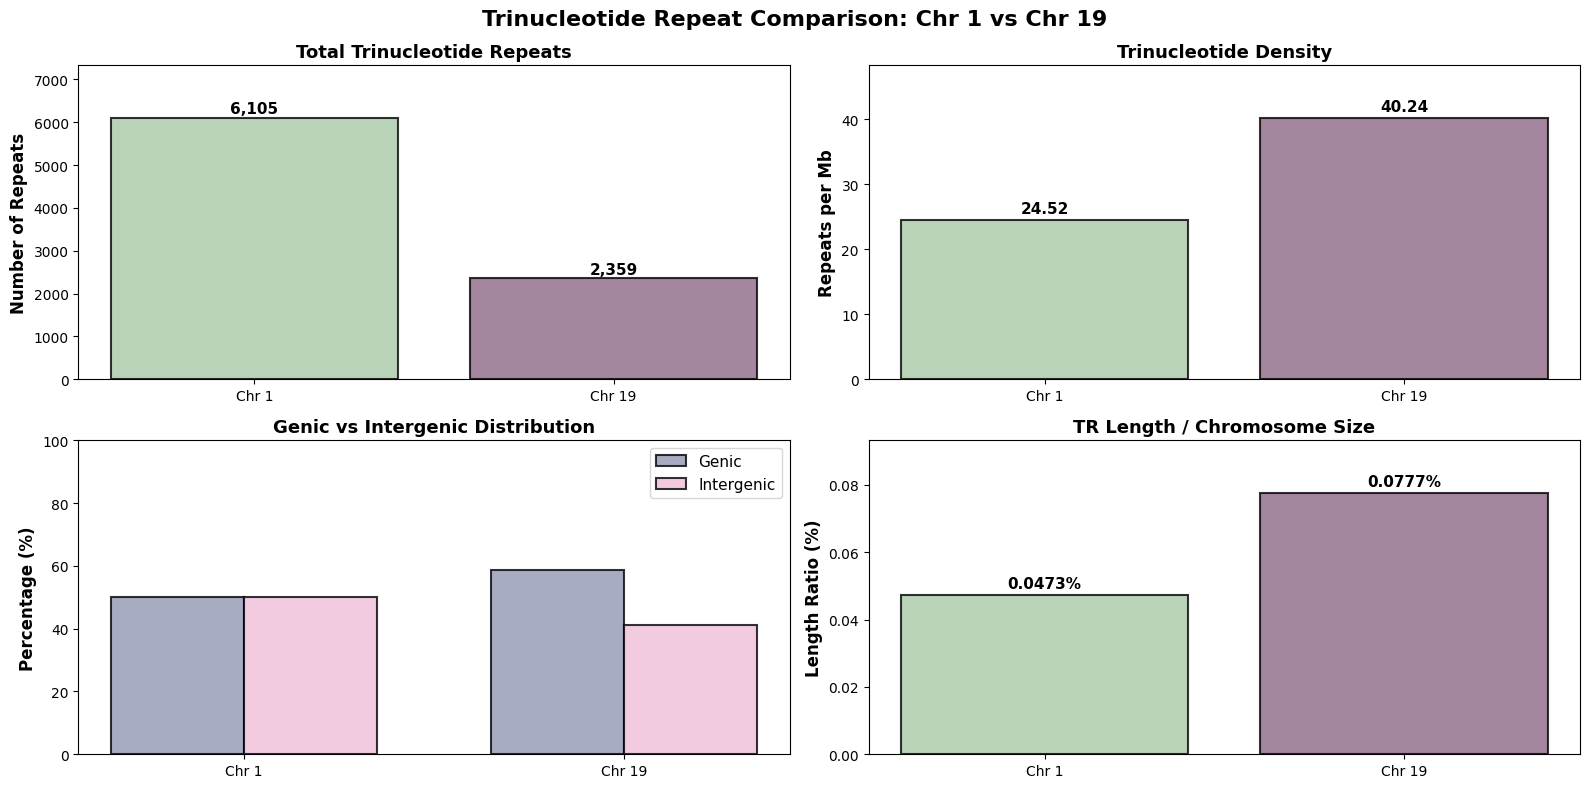


Figure 1. Comparative Overview of Trinucleotide Repeat Characteristics


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Trinucleotide Repeat Comparison: Chr 1 vs Chr 19',
             fontsize=16, fontweight='bold')

# Colors
chr1_color = '#A8C9A6'
chr19_color = '#8D6886'
genic_color = '#9298B5'
intergenic_color = '#EFBEDA'

# Plot 1: Total repeat counts
ax1 = axes[0, 0]
chromosomes = ['Chr 1', 'Chr 19']
counts = [len(df_chr1), len(df_chr19)]
colors = [chr1_color, chr19_color]
ax1.bar(chromosomes, counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Number of Repeats', fontsize=12, fontweight='bold')
ax1.set_title('Total Trinucleotide Repeats', fontsize=13, fontweight='bold')
ax1.set_ylim(0, max(counts) * 1.2)
for i, v in enumerate(counts):
    ax1.text(i, v + 100, f'{v:,}', ha='center', fontweight='bold', fontsize=11)

# Plot 2: Density (repeats per Mb)
ax2 = axes[0, 1]
densities = [24.52, 40.24]
ax2.bar(chromosomes, densities, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Repeats per Mb', fontsize=12, fontweight='bold')
ax2.set_title('Trinucleotide Density', fontsize=13, fontweight='bold')
ax2.set_ylim(0, max(densities) * 1.2)
for i, v in enumerate(densities):
    ax2.text(i, v + 1, f'{v:.2f}', ha='center', fontweight='bold', fontsize=11)

# Plot 3: Genic vs Intergenic percentages
ax3 = axes[1, 0]
genic_pcts = [50.01, 58.71]
intergenic_pcts = [49.99, 41.29]
x = range(len(chromosomes))
width = 0.35
ax3.bar([i - width/2 for i in x], genic_pcts, width, label='Genic',
        color=genic_color, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.bar([i + width/2 for i in x], intergenic_pcts, width, label='Intergenic',
        color=intergenic_color, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax3.set_title('Genic vs Intergenic Distribution', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(chromosomes)
ax3.legend(fontsize=11)
ax3.set_ylim(0, 100)

# Plot 4: Length ratio comparison
ax4 = axes[1, 1]
length_ratios = [0.0473, 0.0777]
ax4.bar(chromosomes, length_ratios, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Length Ratio (%)', fontsize=12, fontweight='bold')
ax4.set_title('TR Length / Chromosome Size', fontsize=13, fontweight='bold')
ax4.set_ylim(0, max(length_ratios) * 1.2)
for i, v in enumerate(length_ratios):
    ax4.text(i, v + 0.002, f'{v:.4f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()
print("\nFigure 1. Comparative Overview of Trinucleotide Repeat Characteristics")

### **Figure 2. Top Motifs Bar Plots**

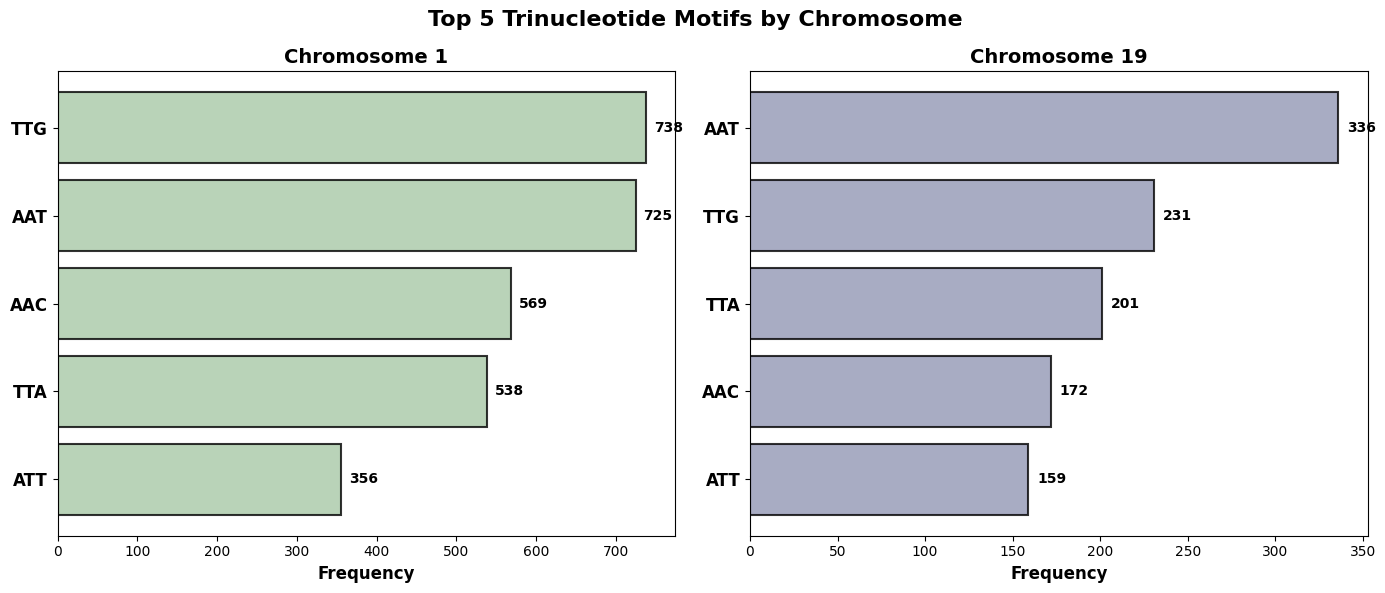


Figure 2. Universal Conservation of AT-Rich Trinucleotide Motifs


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Top 5 Trinucleotide Motifs by Chromosome',
             fontsize=16, fontweight='bold')

# Colors
chr1_color =  '#A8C9A6'
chr19_color = '#9298B5'

# Chr 1 top motifs
ax1 = axes[0]
chr1_top = df_chr1['motif'].value_counts().head(5)
bars1 = ax1.barh(range(len(chr1_top)), chr1_top.values, color=chr1_color,
                 alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(chr1_top)))
ax1.set_yticklabels(chr1_top.index, fontsize=12, fontweight='bold')
ax1.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Chromosome 1', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
for i, (idx, val) in enumerate(chr1_top.items()):
    ax1.text(val + 10, i, f'{val}', va='center', fontweight='bold')

# Chr 19 top motifs
ax2 = axes[1]
chr19_top = df_chr19['motif'].value_counts().head(5)
bars2 = ax2.barh(range(len(chr19_top)), chr19_top.values, color=chr19_color,
                 alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(chr19_top)))
ax2.set_yticklabels(chr19_top.index, fontsize=12, fontweight='bold')
ax2.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Chromosome 19', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
for i, (idx, val) in enumerate(chr19_top.items()):
    ax2.text(val + 5, i, f'{val}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()
print("\nFigure 2. Universal Conservation of AT-Rich Trinucleotide Motifs")

### **Figure 3. Genomic Distribution Density Plot**

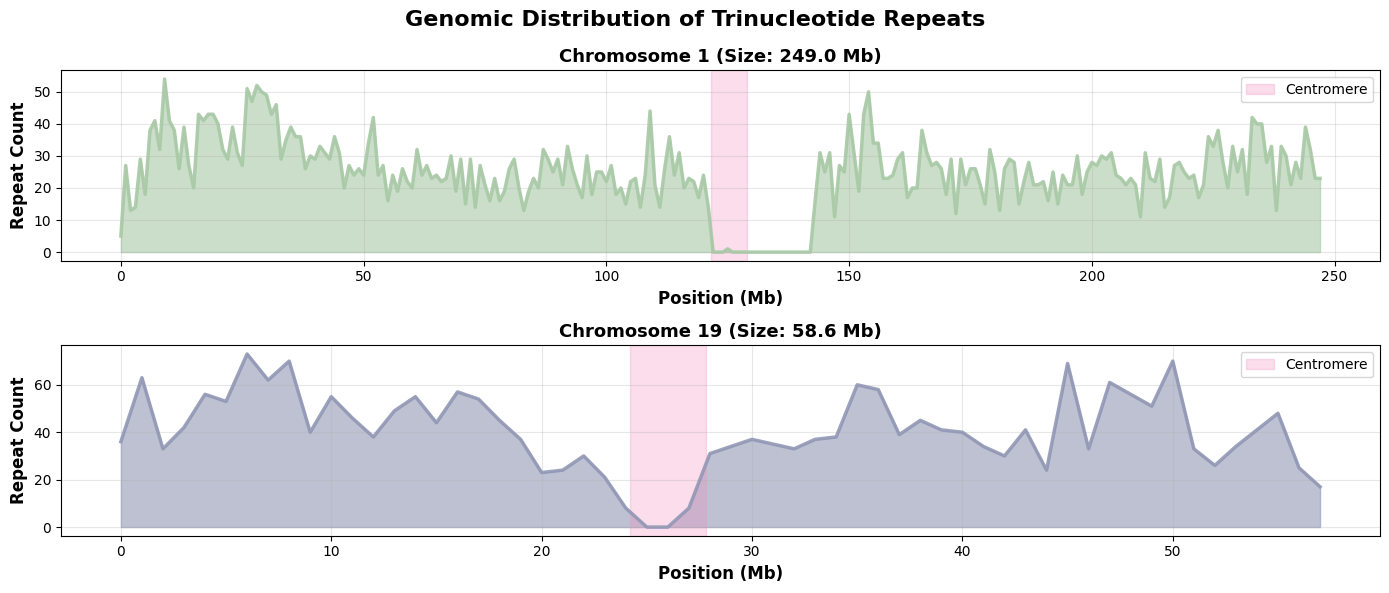


Figure 3. Trinucleotide Repeat Distribution Across Chromosomes


In [ ]:
import numpy as np

fig, axes = plt.subplots(2, 1, figsize=(14, 6))
fig.suptitle('Genomic Distribution of Trinucleotide Repeats',
             fontsize=16, fontweight='bold')

# Colors
chr1_color =  '#A8C9A6'
chr19_color = '#9298B5'

def plot_genomic_distribution(df, ax, chr_name, chr_size, centromere_start,
                                centromere_end, color):
    """
    Plots the genomic distribution of trinucleotide repeats for a given chromosome.
    """
    # Create bins for histogram
    bins = np.arange(0, chr_size, 1_000_000)
    # Count repeats in each bin
    counts, _ = np.histogram(df['start'], bins=bins)

    # Plot the distribution as a filled area and a line
    ax.fill_between(bins[:-1] / 1_000_000, counts, alpha=0.6, color=color)
    ax.plot(bins[:-1] / 1_000_000, counts, linewidth=2.5, color=color, alpha=0.9)

    # Highlight the centromeric region
    ax.axvspan(centromere_start / 1_000_000, centromere_end / 1_000_000,
               alpha=0.3, color='#F58FC0', label='Centromere')

    # Set labels and title
    ax.set_xlabel('Position (Mb)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Repeat Count', fontsize=12, fontweight='bold')
    ax.set_title(f'{chr_name} (Size: {chr_size/1e6:.1f} Mb)', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

# Plot distribution for Chromosome 1
plot_genomic_distribution(df_chr1, axes[0], 'Chromosome 1', CHR1_SIZE,
                         CHR1_CENTRO_START, CHR1_CENTRO_END, chr1_color)
# Plot distribution for Chromosome 19
plot_genomic_distribution(df_chr19, axes[1], 'Chromosome 19', CHR19_SIZE,
                         CHR19_CENTRO_START, CHR19_CENTRO_END, chr19_color)

plt.tight_layout()
plt.show()
print("\nFigure 3. Trinucleotide Repeat Distribution Across Chromosomes")

### **Figure 4. Genic vs Intergenic Pie Charts**

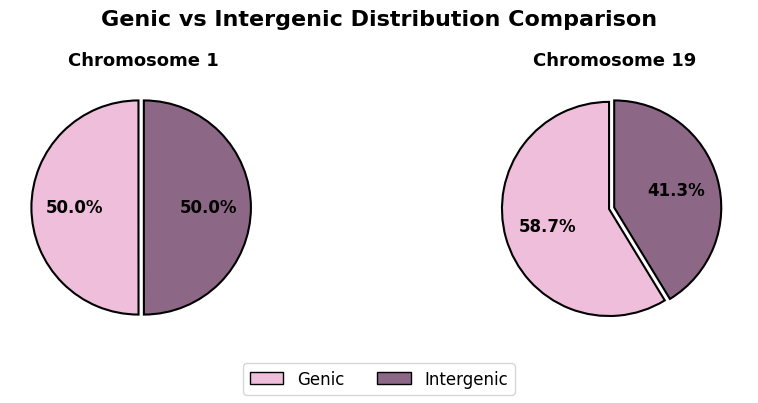


Figure 4. Genic vs Intergenic Distribution Across Chromosomes


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Genic vs Intergenic Distribution Comparison',
             fontsize=16, fontweight='bold')

#Colors
genic_color = '#EFBEDA'
intergenic_color = '#8D6886'
colors = [genic_color, intergenic_color]
explode = (0.05, 0)

# Chr 1
chr1_counts = df_chr1['genic_status'].value_counts()
axes[0].pie(chr1_counts, autopct='%1.1f%%', colors=colors, explode=explode,
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[0].set_title('Chromosome 1', fontsize=13, fontweight='bold')

# Chr 19
chr19_counts = df_chr19['genic_status'].value_counts()
axes[1].pie(chr19_counts, autopct='%1.1f%%', colors=colors, explode=explode,
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title('Chromosome 19', fontsize=13, fontweight='bold')

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=genic_color, edgecolor='black', label='Genic'),
                   Patch(facecolor=intergenic_color, edgecolor='black', label='Intergenic')]
fig.legend(handles=legend_elements, loc='lower center', ncol=2,
          fontsize=12, frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()
print("\nFigure 4. Genic vs Intergenic Distribution Across Chromosomes")

### **Figure 5. Repeat Length vs Genomic Position Scatterplot**

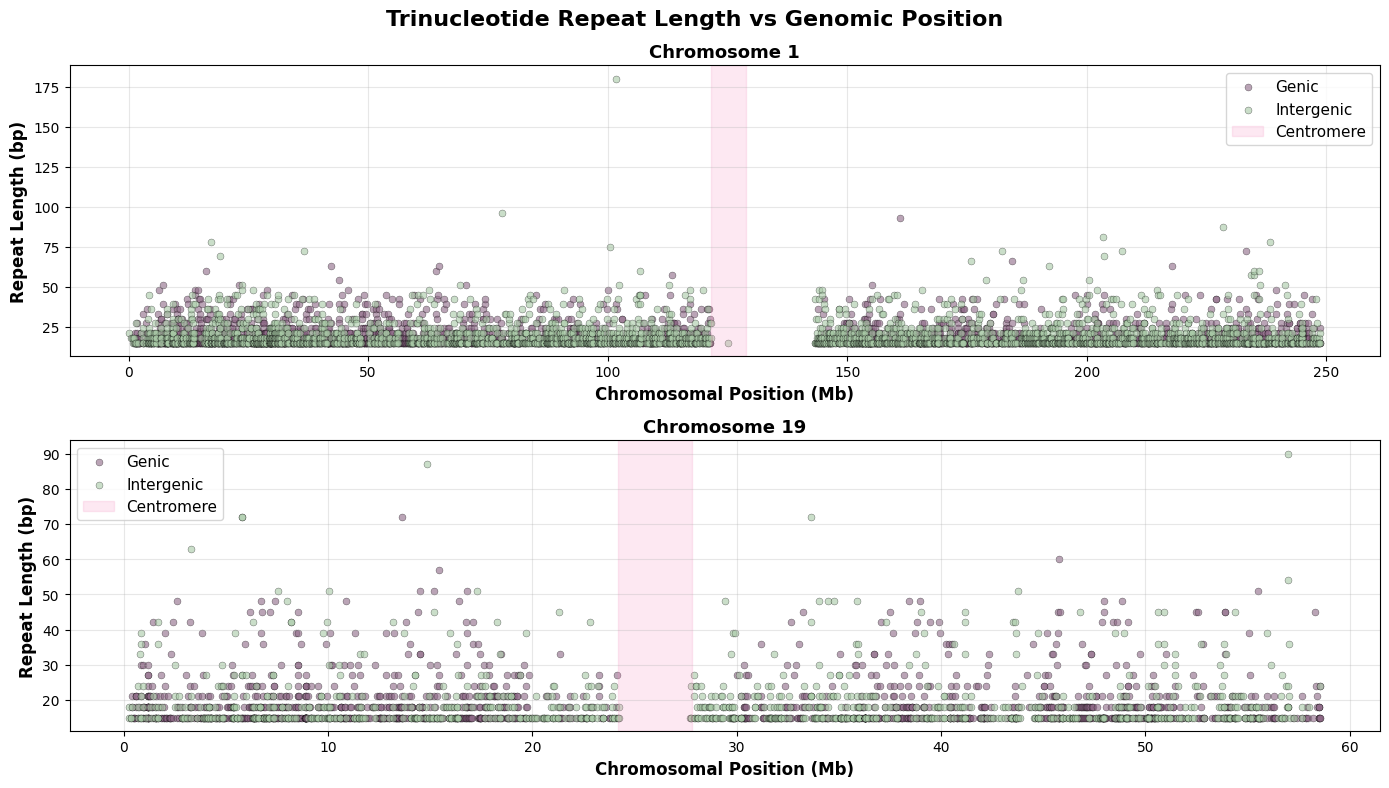


Figure 5. Repeat Length Distribution Across Chromosomal Landscapes


In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Trinucleotide Repeat Length vs Genomic Position',
             fontsize=16, fontweight='bold')

# Colors
genic_color = '#8D6886'
intergenic_color = '#A8C9A6'

# Chr 1
ax1 = axes[0]

# Separate data for genic and intergenic regions on Chr 1
genic_chr1 = df_chr1[df_chr1['genic_status'] == 'genic']
intergenic_chr1 = df_chr1[df_chr1['genic_status'] == 'intergenic']

# Scatter plot for genic repeats on Chr 1
ax1.scatter(genic_chr1['start'] / 1e6, genic_chr1['total_length'],
           alpha=0.6, s=25, color=genic_color, label='Genic', edgecolors='black', linewidth=0.3)

# Scatter plot for intergenic repeats on Chr 1
ax1.scatter(intergenic_chr1['start'] / 1e6, intergenic_chr1['total_length'],
           alpha=0.6, s=25, color=intergenic_color, label='Intergenic', edgecolors='black', linewidth=0.3)

# Highlight the centromeric region on Chr 1
ax1.axvspan(CHR1_CENTRO_START / 1e6, CHR1_CENTRO_END / 1e6,
           alpha=0.2, color='#F58FC0', label='Centromere')

# Set labels and title for Chr 1 plot
ax1.set_xlabel('Chromosomal Position (Mb)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Repeat Length (bp)', fontsize=12, fontweight='bold')
ax1.set_title('Chromosome 1', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)

# Chr 19
ax2 = axes[1]

# Separate data for genic and intergenic regions on Chr 19
genic_chr19 = df_chr19[df_chr19['genic_status'] == 'genic']
intergenic_chr19 = df_chr19[df_chr19['genic_status'] == 'intergenic']

# Scatter plot for genic repeats on Chr 19
ax2.scatter(genic_chr19['start'] / 1e6, genic_chr19['total_length'],
           alpha=0.6, s=25, color=genic_color, label='Genic', edgecolors='black', linewidth=0.3)

# Scatter plot for intergenic repeats on Chr 19
ax2.scatter(intergenic_chr19['start'] / 1e6, intergenic_chr19['total_length'],
           alpha=0.6, s=25, color=intergenic_color, label='Intergenic', edgecolors='black', linewidth=0.3)

# Highlight the centromeric region on Chr 19
ax2.axvspan(CHR19_CENTRO_START / 1e6, CHR19_CENTRO_END / 1e6,
           alpha=0.2, color='#F58FC0', label='Centromere')

# Set labels and title for Chr 19 plot
ax2.set_xlabel('Chromosomal Position (Mb)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Repeat Length (bp)', fontsize=12, fontweight='bold')
ax2.set_title('Chromosome 19', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()
print("\nFigure 5. Repeat Length Distribution Across Chromosomal Landscapes")

## **VI. Discussion**

### **Trinucleotide Distribution is Driven by Local Context Instead of Size**

- Chr 19 has 40.24 repeats/Mb compared to Chr 1's 24.52 repeats/Mb (Figure 1, top right)—a 1.64× difference.
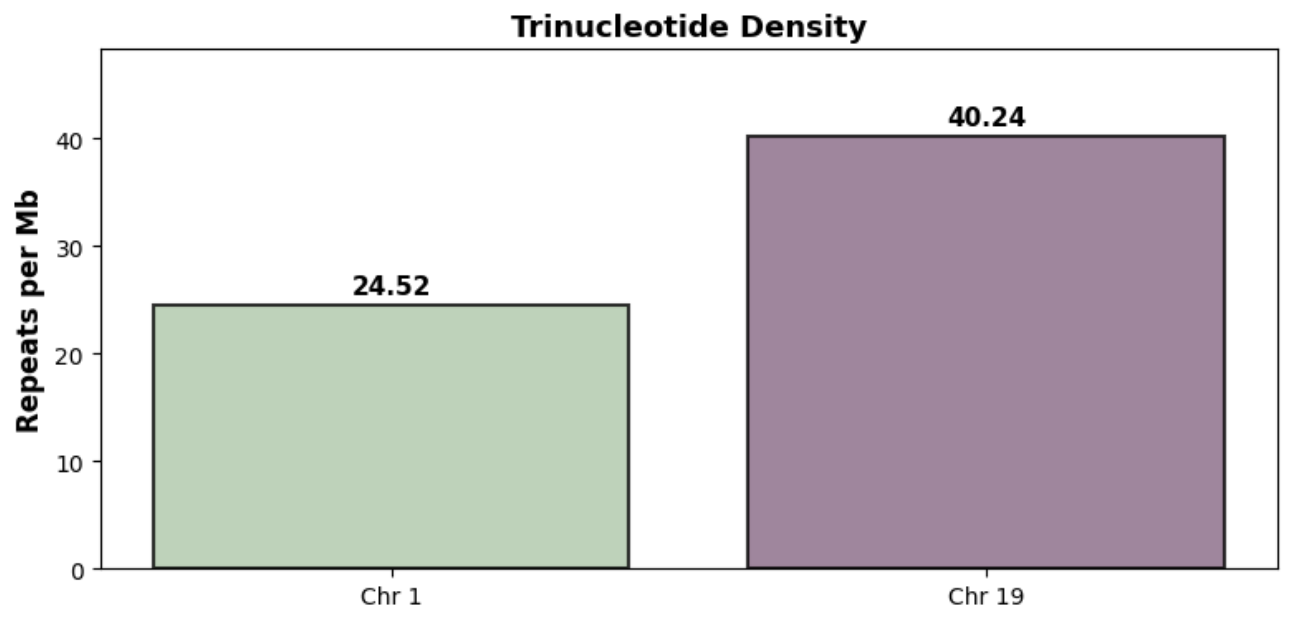

- Despite being 4× smaller, Chr 19 packs more trinucleotides per unit length because it has 3× more genes per Mb. Repeat density follows gene density, not chromosome size.
- This tells us trinucleotides cluster in gene-rich regions, suggesting they either play functional roles near genes or result from transcription-associated processes.


### **Genic Association Increases with Gene Density**

- Chr 1 shows 50.0% genic vs 50.0% intergenic, while Chr 19 shows 58.7% genic vs 41.3% intergenic (Figure 4).
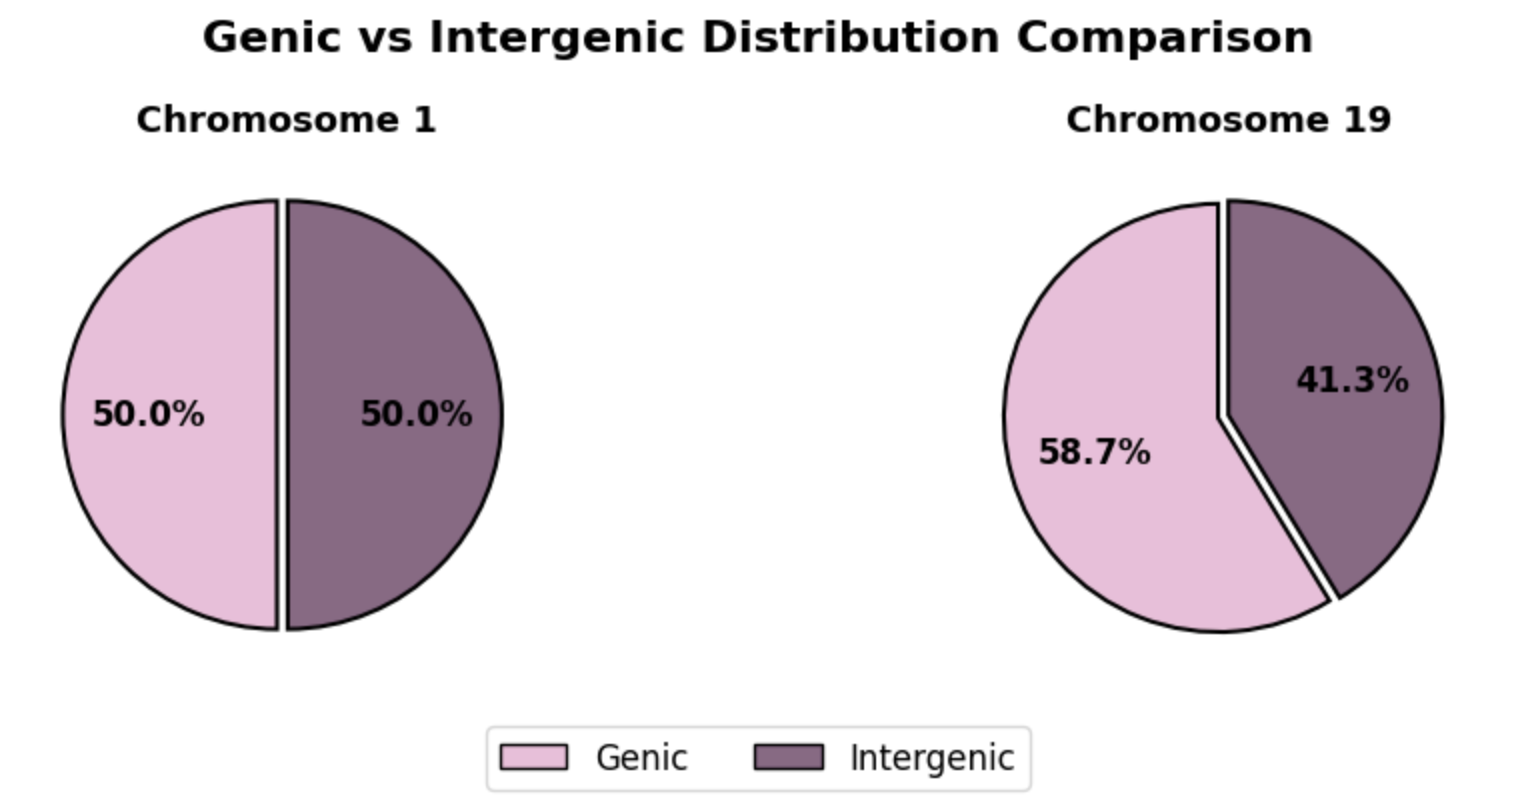

**What this means:** The 8.7% genic enrichment in Chr 19 isn't random—it mirrors the 3× gene density difference. Trinucleotides preferentially occur within or near genes in gene-dense regions. This could mean:
- They play regulatory roles (promoters, enhancers)
- They result from transcription-replication conflicts
- They're byproducts of active chromatin remodeling

**Why it matters:** More genic repeats means more potential for functional consequences when repeats expand. Chr 19's higher genic content may increase regional disease susceptibility.


### **Motif Preferences Are Universal Across Chromosomes**

All top 5 motifs (AAT, TTG, TTA, AAC, ATT) are identical between Chr 1 and Chr 19 (Figure 2), and all are AT-rich.
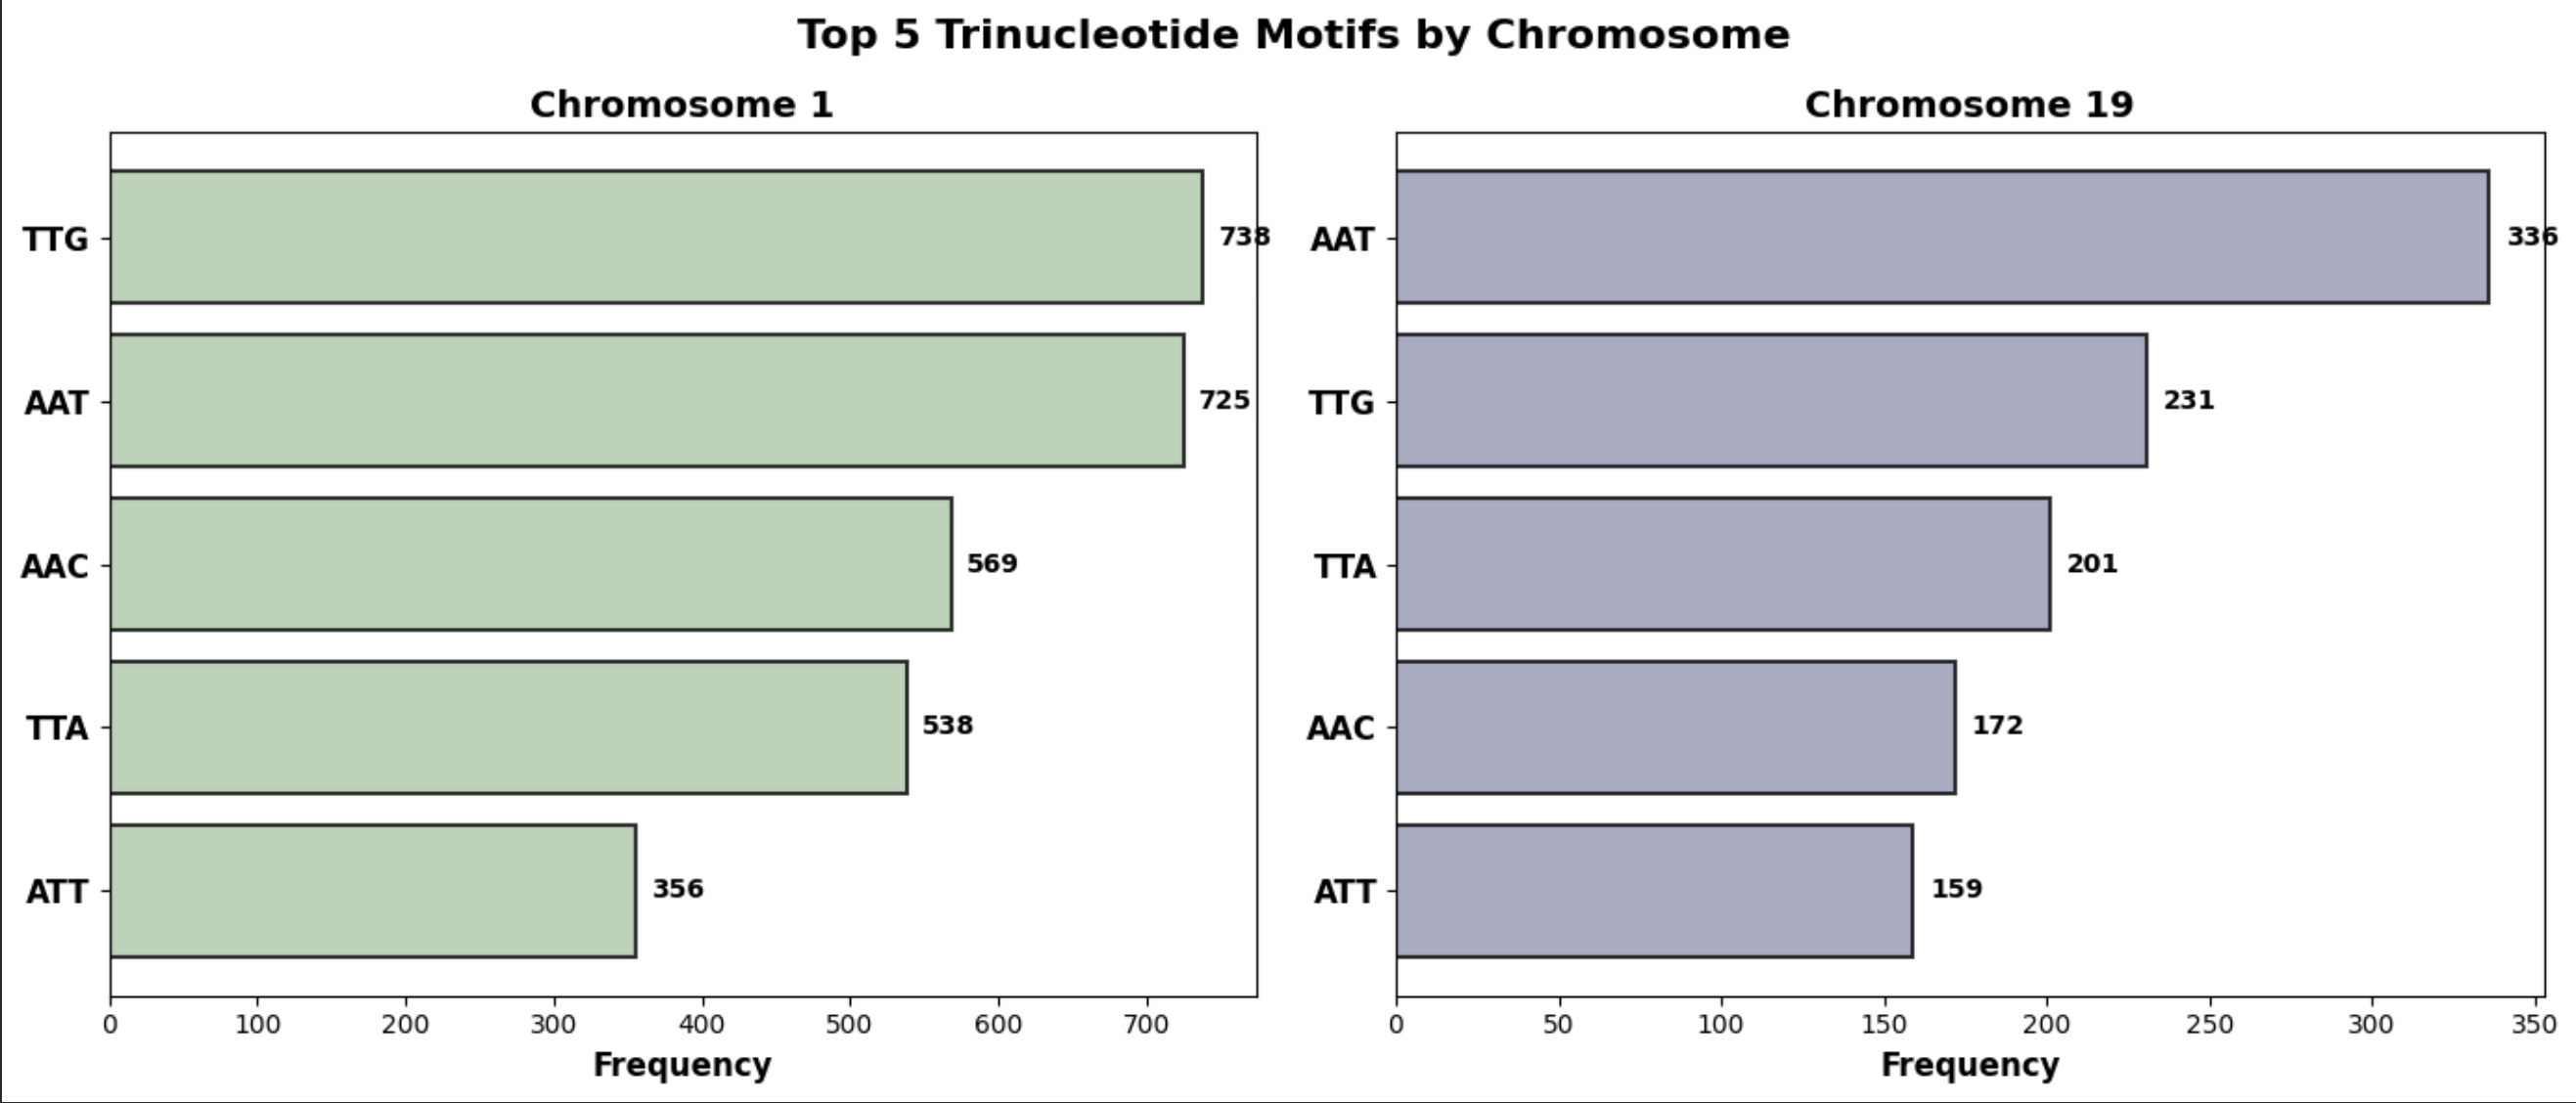

**What this means:** Motif preferences don't change with chromosome size or gene density. This universal pattern reflects DNA chemistry: AT base pairs are less stable than GC pairs, making AT-rich sequences more prone to replication slippage. This explains why diseases like Huntington's (CAG repeats) and Fragile X (CGG repeats) involve AT-containing unstable repeats.


### **Trinucleotides Are Exclusive to Active Chromatin**

99.95% (Chr 1) and 99.75% (Chr 19) of repeats are in euchromatin. Centromeres show complete depletion (Figure 3, pink regions).
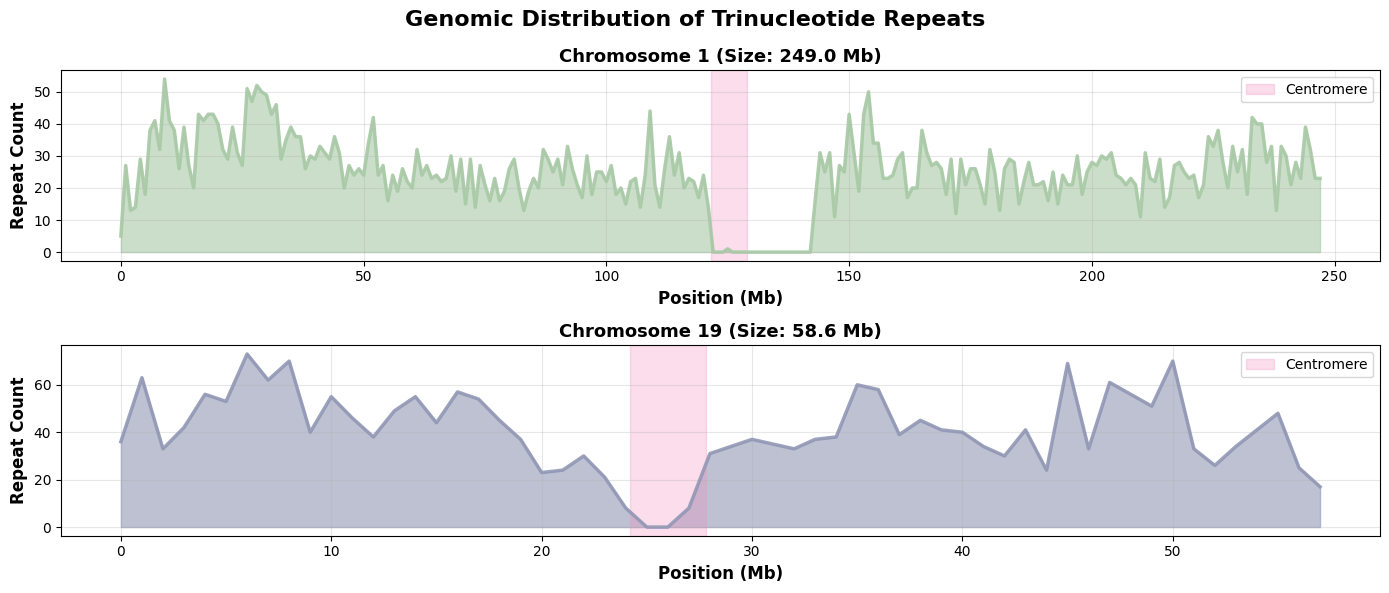

**What this means:** Trinucleotides only form in open, transcriptionally active chromatin. They're absent from:
- Centromeres (tightly packed heterochromatin)
- Telomeres (which use hexanucleotide TTAGGG repeats instead)

Heterochromatin's tight packaging prevents the polymerase slippage that creates trinucleotide repeats. Euchromatin's accessibility allows DNA polymerase errors during replication and transcription.


### **Repeat Lengths Are Consistent Despite Location**

Average length is ~19.3 bp for both chromosomes. Most repeats are 15-30 bp (Figure 5), with rare outliers up to 180 bp in Chr 1.
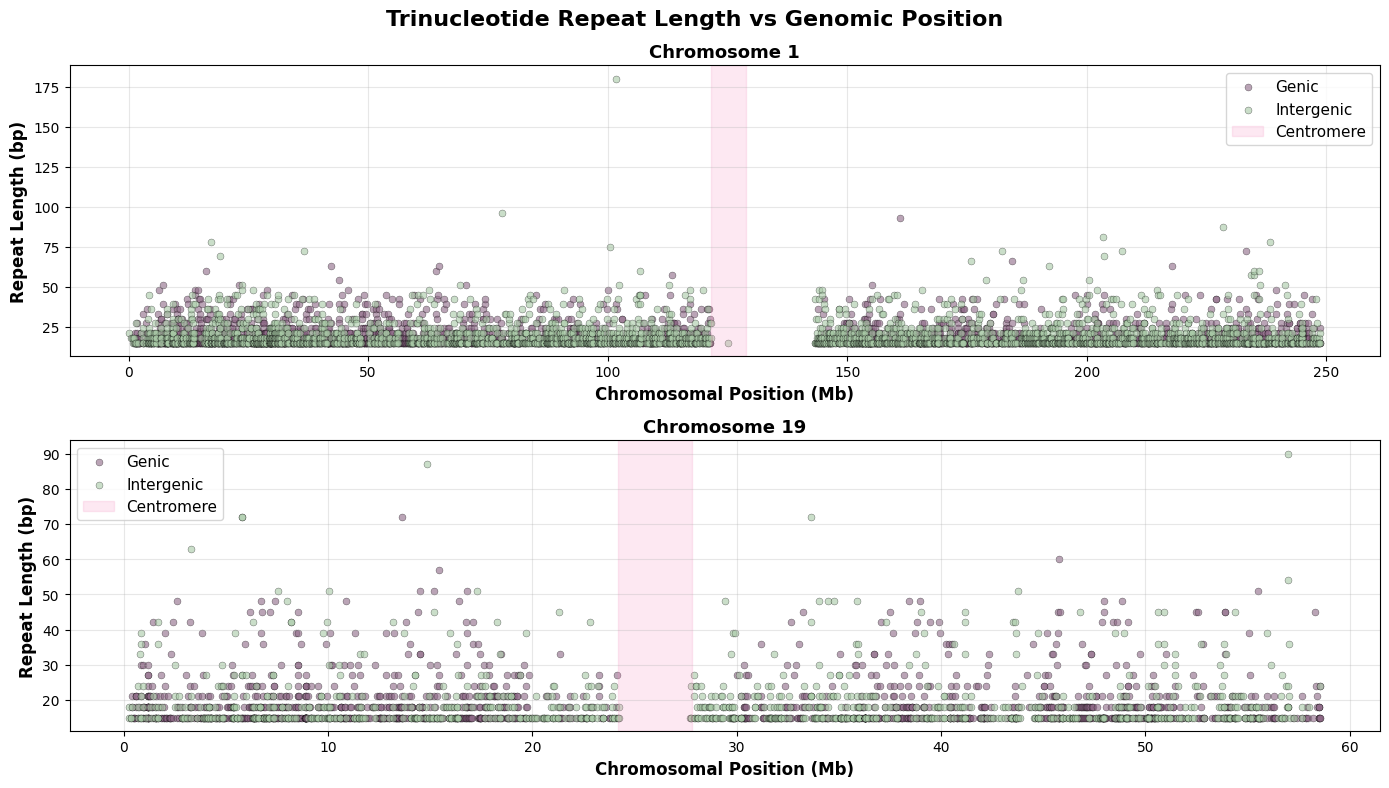


**What this means:** While *how many* repeats form varies by context (density differs), *how long* they grow is constant. Most repeats stabilize at 6-7 copies. The few outliers approaching 60 copies (20-30 repeats × 3 bp) are still below pathogenic thresholds for most trinucleotide diseases (e.g., Huntington's requires >35 copies).

**Implication:** Formation rate is context-dependent, but growth dynamics are universal.


### **Disease Implications**

Our detection of 67 CAG repeats (51 in Chr 1, 16 in Chr 19) shows these disease-associated motifs are widespread, not limited to disease genes. Most are short (<10 copies), but Chr 19's higher genic density (58.7% vs 50.0%) means:
- More repeats positioned within functional genes
- Higher chance expansions affect gene function
- Potential regional disease clustering in gene-dense areas

## **VII. Conclusion**

#### **1. Trinucleotide density scales with gene density, not chromosome size**
Chr 19's 1.64× higher density (40.24 vs 24.52 repeats/Mb) despite being 4× smaller proves local genomic context—specifically gene content—determines repeat abundance.

#### **2. Genic association is non-random and density-dependent**
The 8.7% genic enrichment in gene-dense Chr 19 (58.7% vs 50.0%) demonstrates trinucleotides preferentially occur in or near genes, suggesting functional relevance or transcription-linked origins.

#### **3. Motif preferences are universal**
Perfect conservation of AT-rich motifs (AAT, TTG, TTA, AAC, ATT) across both chromosomes reflects intrinsic DNA chemistry rather than chromosome-specific selection. This biochemical constraint explains why AT-rich repeats cause most expansion diseases.

#### **4. Trinucleotides exclusively mark active chromatin**
The 99.9% euchromatin localization in both chromosomes demonstrates these repeats are incompatible with heterochromatin and serve as molecular signatures of transcriptionally active genomic regions.

---

### Biological Significance




> Trinucleotide repeats are **context-dependent genomic features** whose distribution reveals fundamental genome organization principles. They cluster where genes cluster, avoid silent chromatin, and exhibit universal motif preferences governed by DNA stability. This context-dependence creates a paradox: gene-rich regions like Chr 19 simultaneously serve as functional hubs and mutational hotspots, balancing genomic utility against disease risk.


